<a href="https://colab.research.google.com/github/pavankumarallu/K_ML/blob/main/gender_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gender-classification/Transformed Data Set - Sheet1.csv


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts

import tensorflow as tf

In [ ]:
data = pd.read_csv("../input/gender-classification/Transformed Data Set - Sheet1.csv")

In [ ]:
data.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [ ]:
data.isnull().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

In [ ]:
color_order = list(data['Favorite Color'].unique())

In [ ]:
{column : data[column].unique() for column in data.columns}

{'Favorite Color': array(['Cool', 'Neutral', 'Warm'], dtype=object),
 'Favorite Music Genre': array(['Rock', 'Hip hop', 'Folk/Traditional', 'Jazz/Blues', 'Pop',
        'Electronic', 'R&B and soul'], dtype=object),
 'Favorite Beverage': array(['Vodka', 'Wine', 'Whiskey', "Doesn't drink", 'Beer', 'Other'],
       dtype=object),
 'Favorite Soft Drink': array(['7UP/Sprite', 'Coca Cola/Pepsi', 'Fanta', 'Other'], dtype=object),
 'Gender': array(['F', 'M'], dtype=object)}

In [ ]:
def add_prefixes(df,column,prefix):
    return df[column].apply(lambda x: prefix+x)

In [ ]:
data['Favorite Soft Drink'] = add_prefixes(data,'Favorite Soft Drink','s_')

In [ ]:
data

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,s_7UP/Sprite,F
1,Neutral,Hip hop,Vodka,s_Coca Cola/Pepsi,F
2,Warm,Rock,Wine,s_Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,s_Fanta,F
4,Cool,Rock,Vodka,s_Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,Vodka,s_Coca Cola/Pepsi,M
62,Cool,Hip hop,Beer,s_Coca Cola/Pepsi,M
63,Neutral,Hip hop,Doesn't drink,s_Fanta,M
64,Cool,Rock,Wine,s_Coca Cola/Pepsi,M


In [ ]:
data['Favorite Beverage'] = add_prefixes(data,'Favorite Beverage','b_')

In [ ]:
data

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,b_Vodka,s_7UP/Sprite,F
1,Neutral,Hip hop,b_Vodka,s_Coca Cola/Pepsi,F
2,Warm,Rock,b_Wine,s_Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,b_Whiskey,s_Fanta,F
4,Cool,Rock,b_Vodka,s_Coca Cola/Pepsi,F
...,...,...,...,...,...
61,Cool,Rock,b_Vodka,s_Coca Cola/Pepsi,M
62,Cool,Hip hop,b_Beer,s_Coca Cola/Pepsi,M
63,Neutral,Hip hop,b_Doesn't drink,s_Fanta,M
64,Cool,Rock,b_Wine,s_Coca Cola/Pepsi,M


In [ ]:
def onehot_encode(df,columns):
    for column in columns:
        dummies = pd.get_dummies(df[column])
        df = pd.concat([df,dummies],axis = 1)
        df.drop(column,axis = 1,inplace = True)
    return df

In [ ]:
data = onehot_encode(data,['Favorite Music Genre','Favorite Beverage','Favorite Soft Drink'])

In [ ]:
data

,Favorite Color,Gender,Electronic,Folk/Traditional,Hip hop,Jazz/Blues,Pop,R&B and soul,Rock,b_Beer,b_Doesn't drink,b_Other,b_Vodka,b_Whiskey,b_Wine,s_7UP/Sprite,s_Coca Cola/Pepsi,s_Fanta,s_Other
0,Cool,F,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,Neutral,F,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,Warm,F,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
3,Warm,F,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,Cool,F,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,Cool,M,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
62,Cool,M,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
63,Neutral,M,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
64,Cool,M,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [ ]:
data['Favorite Color'] = data['Favorite Color'].apply(lambda x : color_order.index(x))

In [ ]:
data

,Favorite Color,Gender,Electronic,Folk/Traditional,Hip hop,Jazz/Blues,Pop,R&B and soul,Rock,b_Beer,b_Doesn't drink,b_Other,b_Vodka,b_Whiskey,b_Wine,s_7UP/Sprite,s_Coca Cola/Pepsi,s_Fanta,s_Other
0,0,F,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,1,F,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,2,F,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
3,2,F,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,F,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0,M,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
62,0,M,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
63,1,M,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
64,0,M,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0


In [ ]:
encoder_label = LabelEncoder()
data['Gender'] = encoder_label.fit_transform(data['Gender'])

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
y = data['Gender']
x = data.drop('Gender',axis = 1)

In [ ]:
scaler = MinMaxScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns = x.columns)

In [ ]:
x

,Favorite Color,Electronic,Folk/Traditional,Hip hop,Jazz/Blues,Pop,R&B and soul,Rock,b_Beer,b_Doesn't drink,b_Other,b_Vodka,b_Whiskey,b_Wine,s_7UP/Sprite,s_Coca Cola/Pepsi,s_Fanta,s_Other
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
62,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
63,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


<AxesSubplot:>

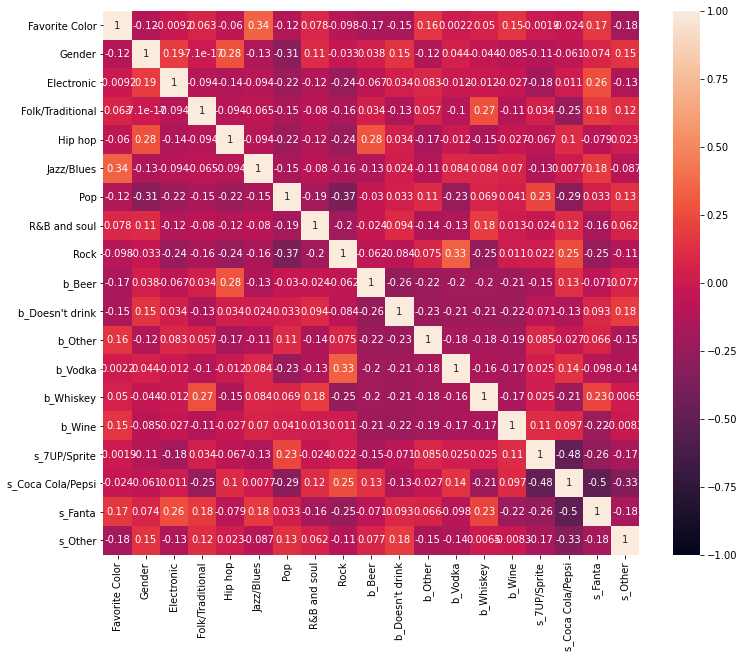

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot = True,vmin = -1,vmax = 1)

In [ ]:
x_train,x_test,y_train,y_test = tts(x,y,train_size=0.7,random_state=0)

In [ ]:
inputs = tf.keras.Input(shape=(18,))
x = tf.keras.layers.Dense(64,activation='relu')(inputs)
x = tf.keras.layers.Dense(64,activation='relu')(x)
outputs = tf.keras.layers.Dense(1,activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs,outputs=outputs)

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

batch_size = 32
epochs = 24



In [ ]:
history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    
    batch_size = batch_size,
    epochs = epochs
    
)

Epoch 1/24
2/2 [==============================] - 1s 636ms/step - loss: 0.7180 - accuracy: 0.3738 - val_loss: 0.6792 - val_accuracy: 0.5000
Epoch 2/24
2/2 [==============================] - 0s 60ms/step - loss: 0.7041 - accuracy: 0.4896 - val_loss: 0.6810 - val_accuracy: 0.5000
Epoch 3/24
2/2 [==============================] - 0s 61ms/step - loss: 0.6949 - accuracy: 0.5579 - val_loss: 0.6828 - val_accuracy: 0.4000
Epoch 4/24
2/2 [==============================] - 0s 60ms/step - loss: 0.6870 - accuracy: 0.5764 - val_loss: 0.6837 - val_accuracy: 0.4000
Epoch 5/24
2/2 [==============================] - 0s 58ms/step - loss: 0.6795 - accuracy: 0.6921 - val_loss: 0.6842 - val_accuracy: 0.4000
Epoch 6/24
2/2 [==============================] - 0s 59ms/step - loss: 0.6710 - accuracy: 0.7211 - val_loss: 0.6847 - val_accuracy: 0.5000
Epoch 7/24
2/2 [==============================] - 0s 59ms/step - loss: 0.6642 - accuracy: 0.7685 - val_loss: 0.6850 - val_accuracy: 0.5000
Epoch 8/24
2/2 [==========

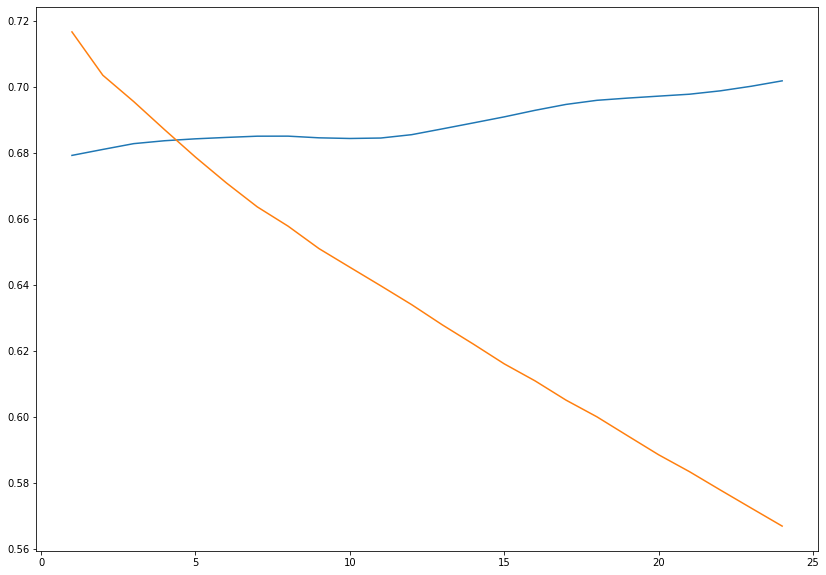

In [ ]:
plt.figure(figsize=(14,10))
epochs_range = range(1,epochs+1)
train_loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs_range,val_loss,label = 'Validation Loss')
plt.plot(epochs_range,train_loss,label = 'Loss')

plt.show()

In [ ]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 18ms/step - loss: 0.6443 - accuracy: 0.7000


[0.6442681550979614, 0.699999988079071]